In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data 
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [4]:
df.shape

(43040, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# numer x,y,z =0 
co=0
for i in df['x']:
    if i==0:
        co+=1
print(co)

co=0
for i in df['y']:
    if i==0:
        co+=1
print(co)

co=0
for i in df['z']:
    if i==0:
        co+=1
print(co)


7
6
17


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
df = df[df['x']!=0]
df = df[df['y']!=0]
df = df[df['z']!=0]

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000,43023.000000
mean,0.796685,61.746194,57.439135,3940.751807,5.724874,5.728482,3.535764
std,0.481183,1.434901,2.239621,4021.138491,1.129919,1.157478,0.711221
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.380000,61.000000,56.000000,939.500000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2387.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5306.000000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

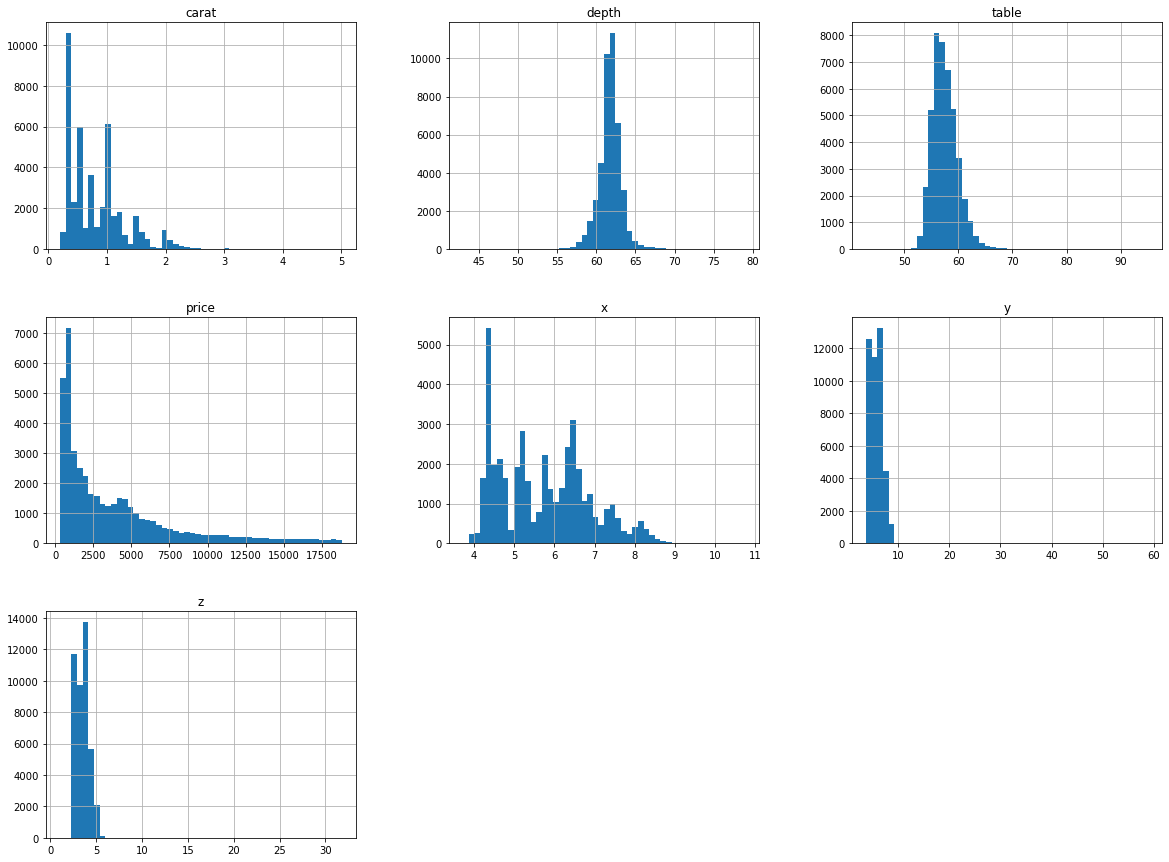

In [13]:
df.hist(bins = 50, figsize = (20, 15))

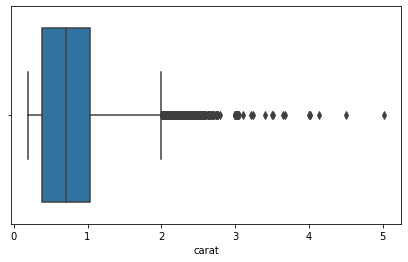

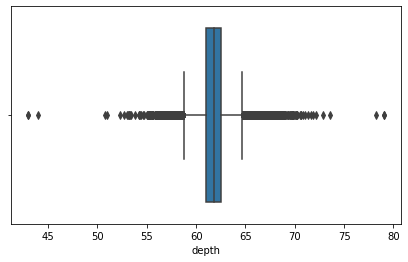

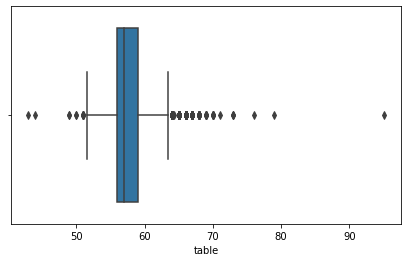

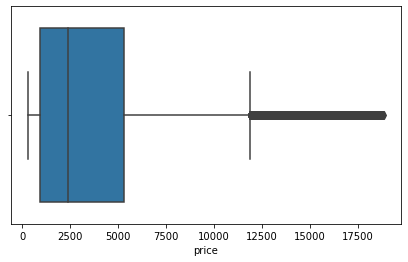

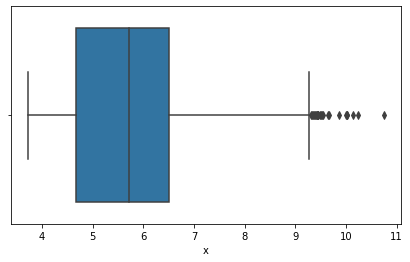

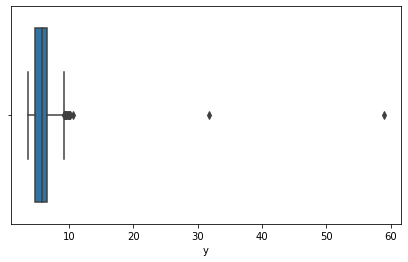

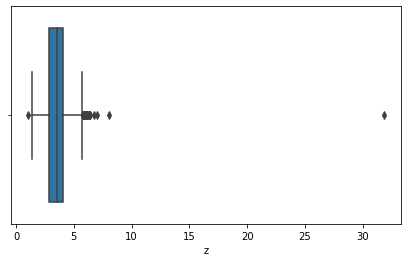

In [14]:
# Getting non-object data
non_obj = list(df.select_dtypes(exclude=['object']))
non_obj
for col in non_obj:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])

In [15]:
new_df = df.copy()
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

lst_all_cols = new_df.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)
print("\n")
# Numerical data distribution
print(list(set(new_df.dtypes.tolist())))
df_num = new_df.select_dtypes(include = ["float64", "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")

indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(new_df[col])
    new_df[col] = np.where(new_df[col] < lower_range, lower_range, new_df[col]) 
    new_df[col] = np.where(new_df[col] > upper_range, upper_range, new_df[col])
    indx = indx +1
    print("-----------------------------")

lst_all_cols : 
 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


[dtype('int64'), dtype('float64'), dtype('O')]
Numerical Data : 
 ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


0
Q1 =  0.38  Q3 =  1.03  IQR =  0.65
-----------------------------
1
Q1 =  61.0  Q3 =  62.5  IQR =  1.5
-----------------------------
2
Q1 =  56.0  Q3 =  59.0  IQR =  3.0
-----------------------------
3
Q1 =  939.5  Q3 =  5306.0  IQR =  4366.5
-----------------------------
4
Q1 =  4.66  Q3 =  6.5  IQR =  1.8399999999999999
-----------------------------
5
Q1 =  4.67  Q3 =  6.5  IQR =  1.83
-----------------------------
6
Q1 =  2.87  Q3 =  4.02  IQR =  1.1499999999999995
-----------------------------


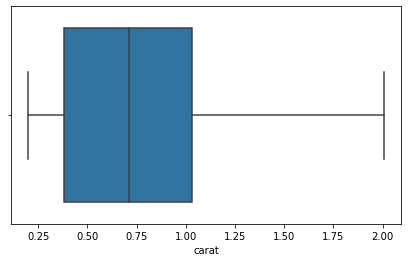

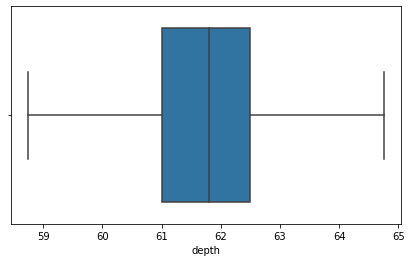

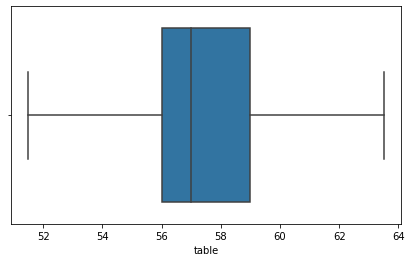

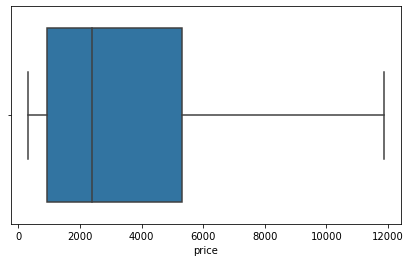

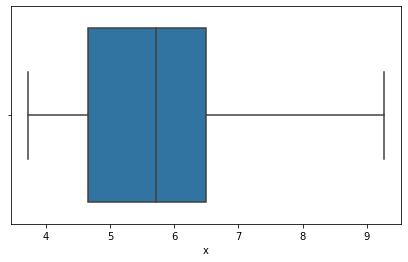

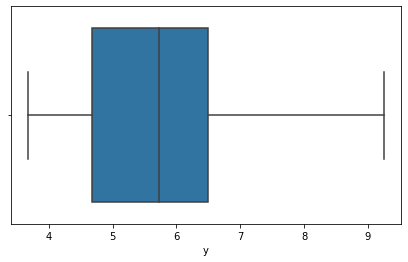

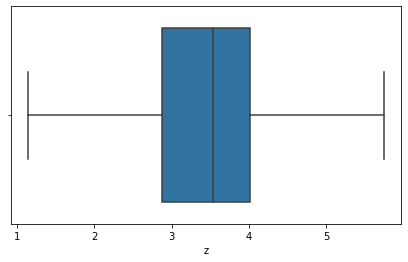

In [16]:
# Getting non-object data
non_obj = list(df.select_dtypes(exclude=['object']))
non_obj
for col in non_obj:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=new_df[col])

In [17]:
# check linearty 


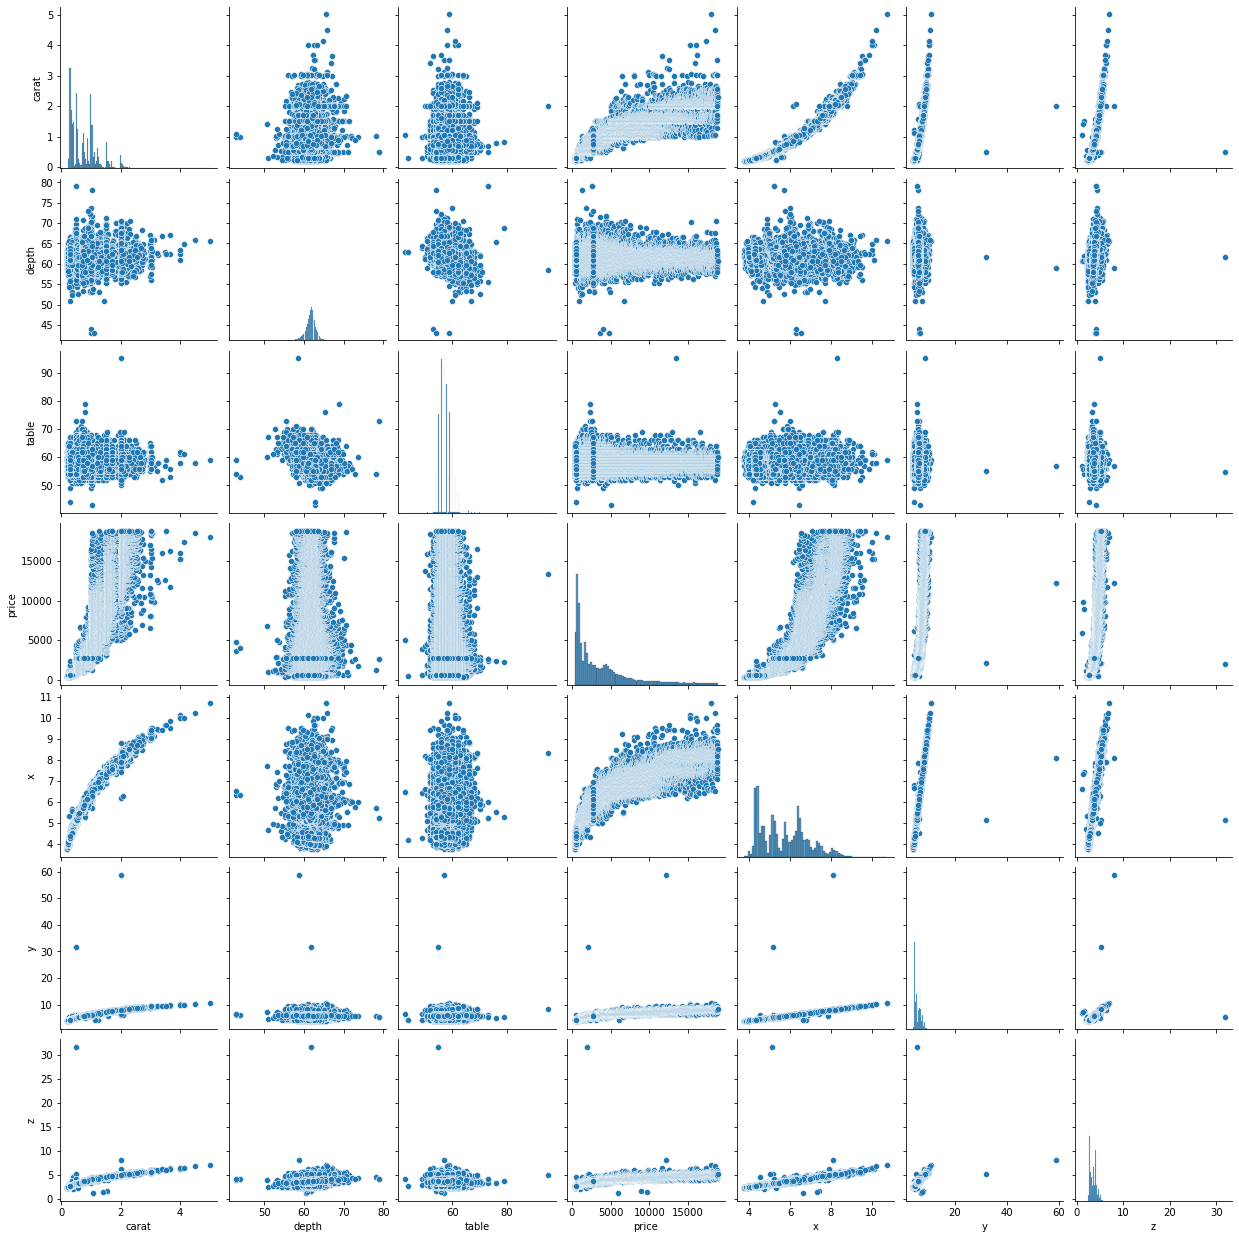

In [18]:
sns.pairplot(df)

In [19]:
new_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [20]:
from sklearn import preprocessing
encoding=preprocessing.LabelEncoder()
new_df["cut"]=encoding.fit_transform(new_df["cut"])
new_df["color"]=encoding.fit_transform(new_df["color"])
new_df["clarity"]=encoding.fit_transform(new_df["clarity"])

In [21]:
new_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
1,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
2,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
3,0.24,4,6,7,62.8,57.0,336.0,3.94,3.96,2.48
4,0.24,4,5,6,62.3,57.0,336.0,3.95,3.98,2.47


<AxesSubplot:>

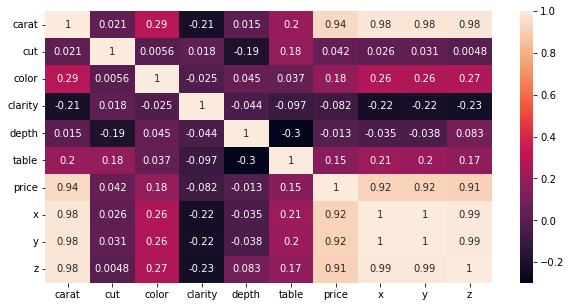

In [22]:
plt.figure(figsize = (10,5))
sns.heatmap(new_df.corr(), annot=True )

In [23]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns='price')
y = new_df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34418, 9) (8605, 9) (34418,) (8605,)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1061249.249010949

In [28]:
r2_score(y_test, y_pred)

0.9100507507047704

In [29]:
print("Train score:")
print(model.score(X_train, y_train))

print("Test score:")
print(model.score(X_test, y_test))

Train score:
0.9114484060405748
Test score:
0.9100507507047704
